# Parte IV Calculo multidimensinal











#### Volumen de una esfera de radio R

$$ V = 8 \int_0^R \int_0^{\sqrt{R^2 - x^2}} f(x,y) dy dx .$$

donde $f(x,y) = \sqrt{R^2 - x^2 - y^2}$.



Este calculo toma mas de 15 minutos en GoogleColab.
La expresion es muy complicada (ver clase anterior).

Sugerimos un cambio de variable.
Llamemos $y=\sqrt{R^2 - x^2} \sin \theta .$$


$$dy = \frac{dy}{d\theta}{d \theta} .$$
$$dy = \sqrt{R^2 - x^2} \cos \theta d \theta .$$


\begin{eqnarray}
f(x, \theta) &=& \sqrt{R^2 - x^2 - (R^2 - x^2) \sin^2 \theta} \sqrt{R^2 - x^2 } \cos \theta \\
&=& \sqrt{ (R^2 - x^2) \cos^2 \theta} \sqrt{R^2 - x^2 } \cos \theta \\
&=& (R^2 - x^2) \cos^2 \theta
\end{eqnarray}














In [1]:
#en sympy
from sympy import sqrt, diff, symbols
import sympy as sp
R = symbols('R', constant=True) # radio
x,y = symbols('x y', real=True)
theta = symbols('theta', Interval=[0, sp.pi/2])
f = sqrt(R**2 - x**2 - y**2)
newY = sqrt(R**2 - x**2)*sp.sin(theta) # sustitucion

fSubs = f.subs( {y:newY})
newF = fSubs*diff(newY, theta)
newF

sqrt(R**2 - x**2)*sqrt(R**2 - x**2 - (R**2 - x**2)*sin(theta)**2)*cos(theta)

In [2]:

from sympy import simplify, radsimp, integrate
newF1 = simplify(newF)
newF2 = radsimp(newF1)
newF2


sqrt((R**2 - x**2)*cos(theta)**2)*sqrt(R**2 - x**2)*cos(theta)

In [3]:
sp.trigsimp(newF2) # why it does not simplify the cos^2(theta) under the square root?

sqrt((R**2 - x**2)*cos(theta)**2)*sqrt(R**2 - x**2)*cos(theta)

In [4]:
I = 8*integrate( newF2, (theta, 0, sp.pi/2), (x, 0 , R))
I

4*pi*R**3/3

## Integrales triples


$$\int \int \int 2 x^2 dx dy dz .$$

In [5]:
f = 2 * x**2
x,y,z = symbols('x y z')
integrate(f,z,y,x)

2*x*x**2*y*z

### Integrales triples definidas

$$ \int_0^1 \int_0^{1-x^2} \int_3^{1 - x^2 - y^2} 2 x^2 dx dy dz .$$

La siguiente integral no es analitica

$$\int_0^1 \int_0^{1 - x^2} \int_0^{1 -x^2 - y^2} 3 x \mathrm{e}^{-y} \cos z dz dy dx .$$




In [6]:
from sympy import exp, cos
x,y,z = symbols('x y z')
f = 2*x**2
limitsz = (z, 3, 1-x**2- y**2)
limitsy = (y, 0, 1 - x**2)
limitsx = (x, 0, 1)
I = integrate(f, limitsz, limitsy, limitsx)
I

-92/135

In [7]:
# tratamos la segunda
import time
start = time.time()
f = x*exp(-y)*cos(x)
I = integrate(f, limitsz, limitsy, limitsx)
I
end=time.time()
print("Timing=",end-start)

Timing= 1477.4236462116241


In [8]:
I

-exp(-1)*Integral(x*(-x**4*exp(x**2) + 3*x**2*exp(x**2) + E*x**2 - 7*exp(x**2) + 4*E)*cos(x), (x, 0, 1))

In [44]:
# veamos como seria numericamente
import numpy as np
from scipy.integrate import tplquad
f = lambda z,y,x : x*np.exp(-y)*np.cos(z)
tplquad( f, 0,1, lambda x: 0, lambda x: 1 - x**2,
        lambda x, y:0, lambda x, y: 1 - x**2)

(0.10693034356581144, 3.954710847324702e-15)

# Calculo Multidimensinal Parte V.

Comenzamos definiendo una funcion parametrica en 3D

In [45]:
import sympy as sp
from sympy import symbols, Matrix, Function, diff, integrate
t = symbols('t', real=True)
x,y,z, f = symbols('x y z f', cls=Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = Matrix( [x, y, z])
r

Matrix([
[x(t)],
[y(t)],
[z(t)]])

## integrales de linea

Si $C=(x(t), y(t), z(t))$ es una curva parametrizada por $t$, entonces, la integral a lo largo de la curva entre $t=a,b$

$$\int_C f(x,y,z) dt = \int_a^b f( (x(t), y(t), z(t)) dt .$$

Podemos hacer cambio de variable. Por ejemplo, longitud
de arco $s$

$$\int_C f(x,y,z) ds = \int_a^b f( (x(t), y(t), z(t)) \frac{ds}{dt} dt .$$

donde

$$\frac{ds}{dt} = \sqrt{ \dot{x}^2 + \dot{y}^2 + \dot{z}^2} .$$

Es decir
$$\int_C f(x,y,z) ds = \int_a^b f( (x(t), y(t), z(t)) \sqrt{\dot{x}^2 + \dot{y}^2+ \dot{z}^2} dt .$$

O en notacion vectorial


$$\int_C f dx = \int_a^b f(r(t)) \| \dot{r}^2 \| .$$

Vamos `SymPy`

In [46]:
f=f(x,y,z)
f


f(x(t), y(t), z(t))

In [47]:
Dfdt = diff(r,t)
integrand = f*sqrt(Dfdt.dot(Dfdt))
integrand

sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)*f(x(t), y(t), z(t))

In [48]:
a = symbols('a')
b = symbols('b')
integ = integrate( integrand, (t, a,b))
integ

Integral(sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)*f(x(t), y(t), z(t)), (t, a, b))

In [49]:
# verificacion la integral de linea entre a y a
integ = integrate( integrand, (t, a, a))
integ

0

Ejemplo:

Halle
$$ \int_C (x^2 + y^2 + z) ds .$$
a lo largo de una helix

$$ r(t) = ( \cos t, \sin t, t) .$$
$t \in [0, 2 \pi].$

In [50]:
int2 = integrand.subs(  { f: x**2 + y**2 + z, x: sp.cos(t),
                       y: sp.sin(t),
                        z: t})
int2

(t + sin(t)**2 + cos(t)**2)*sqrt(Derivative(t, t)**2 + Derivative(sin(t), t)**2 + Derivative(cos(t), t)**2)

In [51]:
int3 = int2.simplify()
int3

(t + 1)*sqrt(sin(t)**2 + cos(t)**2 + 1)

In [52]:
int4 = int3.simplify()
int4

sqrt(2)*(t + 1)

In [53]:
# ese el integrando
sln = integrate( int4, (t, 0, 2*sp.pi))
sln

2*sqrt(2)*pi + 2*sqrt(2)*pi**2

In [54]:
sln.evalf()

36.8012226748722

## Un ejemplo de solucion no analitica
Encuentre

$$\int_C f(x,y,z) dt .$$
donde $f(x,y,x)= 2 y \mathrm{e}^{-x^2} + \sqrt{x}$ donde
$C$ es el camino recorrido por la helice
$$(\cos t, \sin t , t) $$
y $t \in [0, 2 \pi]$

In [55]:
int2 = integrand.subs( {f: 2*sp.exp(-x**2)*y+ sp.sqrt(z),
                        x: sp.cos(t),
                        y: sp.sin(t),
                        z : t})
display(int2)

(sqrt(t) + 2*exp(-cos(t)**2)*sin(t))*sqrt(Derivative(t, t)**2 + Derivative(sin(t), t)**2 + Derivative(cos(t), t)**2)

In [56]:
int3 = int2.simplify()
int3

(sqrt(t) + 2*exp(sin(t)**2 - 1)*sin(t))*sqrt(sin(t)**2 + cos(t)**2 + 1)

In [57]:
int4 = int3.simplify()
int4

sqrt(2)*(sqrt(t) + 2*exp(-cos(t)**2)*sin(t))

In [58]:
# these lines take all the possible time in GoogleColab.
# hence it is commented out

'''
import time
start=time.time()
I=integrate( int4, (t, 0, 2*sp.pi))
end=time.time()
display(I)
print("Timing=",end-start)
'''



'\nimport time\nstart=time.time()\nI=integrate( int4, (t, 0, 2*sp.pi))\nend=time.time()\ndisplay(I)\nprint("Timing=",end-start)\n'

In [59]:
# hagaslo numerico
from sympy import lambdify
from scipy.integrate import quad

intLambd = lambdify( [t], int4)
quad(intLambd, 0, 2*sp.pi)

(14.848874658217891, 1.6485562535326506e-14)

### Actividad #1
Considere un alhambre en forma de helice $(\cos t, \sin t, t)$. Si la densidad del alhambre esta dada por $\rho(x,y,z)=x^2 \exp(-y^2) \cos x$  encuentre la **masa** del alhambre.
Trate analitco sino numerico.

### Campos Vectoriales
Son funciones de $\mathbb{R}^m$ en $\mathbb{R}^n$, $m,n>1$.

Es decir

\begin{eqnarray}
f : \mathbb{R}^m &\to& \mathbb{R}^n \\
x &\mapsto& f(x)
\end{eqnarray}

Vamos a ver varios ejemplos y como graficar campos vectoriales de $\mathbb{R}^2$ en $\mathbb{R}^2$


El siguiente ejemplo basado en
[The tutorialspoint](https://www.tutorialspoint.com/matplotlib/matplotlib_quiver_plot.htm).

Toma el siguiente campo escalar,

\begin{eqnarray}
z : \mathbb{R}^2 &\to& \mathbb{R} \\
x &\mapsto& z(x,y) = x \exp(-x^2 - y^2)
\end{eqnarray}
el gradiente de este campo escalar es un campo vectorial.

\begin{eqnarray}
\nabla z : \mathbb{R}^2 &\to& \mathbb{R}^2 \\
(x,y) &\mapsto& \nabla z(x,y) = \binom{
    \frac{\partial z}{\partial x}}{\frac{\partial z}{\partial y}}
\end{eqnarray}




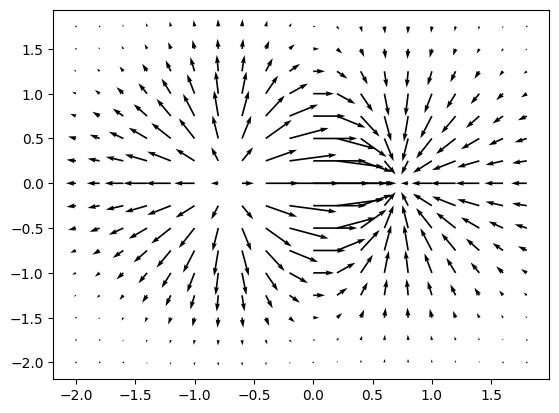

In [60]:
import matplotlib.pyplot as plt
import numpy as np
x,y=np.meshgrid(   np.arange( -2, 2, 0.2), np.arange(-2,2,0.25))
z= x*np.exp(-x**2 - y**2)
v, u = np.gradient(z, .2, .2)
fig, ax = plt.subplots()
q = ax.quiver(x,y,u,v)
plt.show()

Complementamos el ejemplo anterior con otro

\begin{eqnarray}
E_x &=& \frac{x+1}{(x+1)^2 + y^2}  - \frac{x-1}{(x-1)^2 + y^2} \\
E_y &=& \frac{y}{(x+1)^2 + y^2}  - \frac{y}{(x-1)^2 + y^2} \\
\end{eqnarray}



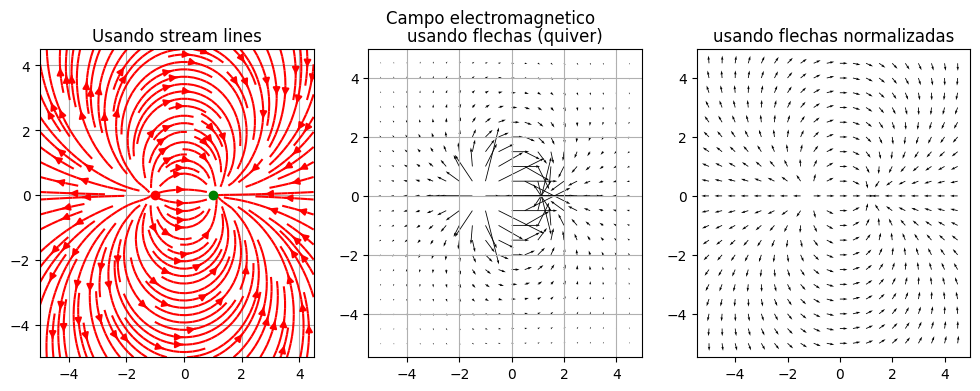

In [61]:
import numpy as np
import matplotlib.pyplot as plt

epsilon=10**(-8)
fig , (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(12,4))
fig.suptitle("Campo electromagnetico")

# coordenadas
x = np.arange(-5,5, 0.5)
y = np.arange(-5,5, 0.5)

x2 = np.arange(-5,5, 0.5)
y2 = np.arange(-5,5, 0.5)

# la malla
X,Y = np.meshgrid(x,y)
X2,Y2 = np.meshgrid(x2,y2)

# direcciones de los vectores
Ex = (X+1)/( (X+1)**2 +Y**2+epsilon) - (X-1)/( (X-1)**2 + Y**2 + epsilon)
Ey = Y/( (X+1)**2 +Y**2+epsilon) - Y/( (X-1)**2 + Y**2 + epsilon)

Ex2 = (X2+1)/( (X2+1)**2 +Y2**2+epsilon) - (X2-1)/( (X2-1)**2 + Y2**2 + epsilon)
Ey2 = Y2/( (X2+1)**2 +Y2**2+epsilon) - Y/( (X2-1)**2 + Y2**2 + epsilon)

Ex2n = ((X2+1)/( (X2+1)**2 +Y2**2+epsilon) -  \
    (X2-1)/( (X2-1)**2 + Y2**2 + epsilon))/np.sqrt( Ex2**2 + Ey2**2)
Ey2n = (Y2/( (X2+1)**2 +Y2**2+epsilon) - \
        Y/( (X2-1)**2 + Y2**2 + epsilon))/np.sqrt(Ex2**2 + Ey2**2)


# graficamos
ax1.streamplot( X, Y, Ex, Ey, density=1.4, linewidth=None, color='red')
ax1.set_title("Usando stream lines")
ax1.plot(-1, 0, '-or')
ax1.plot(1, 0, '-og')
ax1.grid()
ax2.grid()
ax3.grid()
ax2.set_title("usando flechas (quiver)")
ax3.set_title("usando flechas normalizadas")

ax2.quiver(X2, Y2, Ex2, Ey2)
ax3.quiver(X2, Y2, Ex2n, Ey2n)

plt.grid()
plt.show()




# phase plots


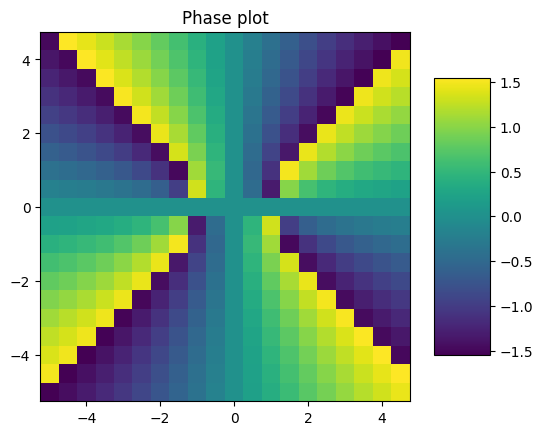

In [62]:
theta = np.arctan(Ey/Ex + epsilon)


heatmap=theta

surf = plt.pcolormesh(X, Y, heatmap)

plt.axis('image')
plt.title("Phase plot")
plt.colorbar(surf, shrink=0.75, aspect=5)
plt.show()

### Actividad #2
* Generar una grafica como la que muestro abajo (mucho mejor resolucion).

* Exlique los colores arcoiris en los polos $(-1,0)$ y $(1,0)$.

* Explique la descontinuidad a lo largo de la hiperobola $x^2 - y^2 = 1$. Muestre como llegar a esta ecuacion usando `SymPy` y grafique esta curva.




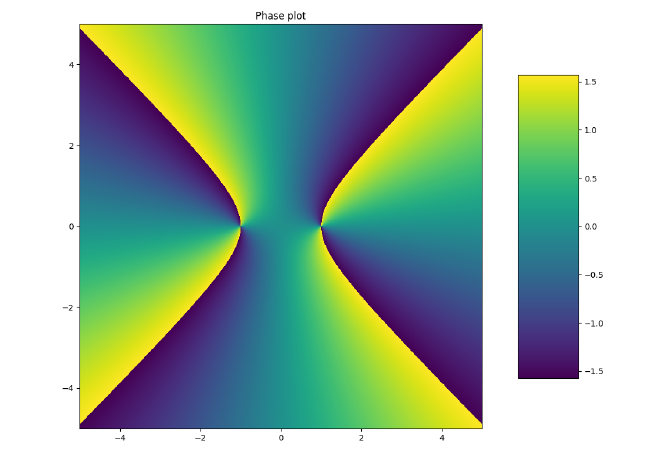